# problem statement
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

# importing libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore

# loading the dataset

In [172]:
df=pd.read_csv("rainfall.csv")

In [173]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [174]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
df.shape

(8425, 23)

there are 8425 rows and 23columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [175]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# REMOVAL OF NULL USING IMPUTER

In [176]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [177]:
l=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [178]:
for i in l:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [179]:
imp2=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [180]:
lint=['MinTemp','MaxTemp',  
 'Rainfall',     
 'Evaporation',    
 'Sunshine',   
 'WindGustSpeed',  
 'WindSpeed9am',  
 'WindSpeed3pm', 
 'Humidity9am',  
 'Humidity3pm',  
 'Pressure9am',   
 'Pressure3pm',   
 'Cloud9am', 
 'Cloud3pm',      
 'Temp9am' ,    
 'Temp3pm']

In [181]:
for i in lint:
    df[i]=imp2.fit_transform(df[i].values.reshape(-1,1))

In [182]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

null values have been removed

# EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

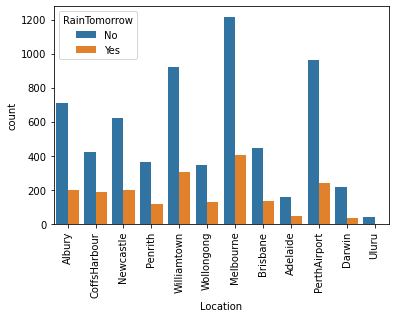

In [30]:
sns.countplot(df['Location'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

from data the maximum rainfall tomorrow will be in Melbourne

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'W'),
  Text(1, 0, 'NNW'),
  Text(2, 0, 'SE'),
  Text(3, 0, 'ENE'),
  Text(4, 0, 'SW'),
  Text(5, 0, 'SSE'),
  Text(6, 0, 'S'),
  Text(7, 0, 'NE'),
  Text(8, 0, 'N'),
  Text(9, 0, 'SSW'),
  Text(10, 0, 'WSW'),
  Text(11, 0, 'ESE'),
  Text(12, 0, 'E'),
  Text(13, 0, 'NW'),
  Text(14, 0, 'WNW'),
  Text(15, 0, 'NNE')])

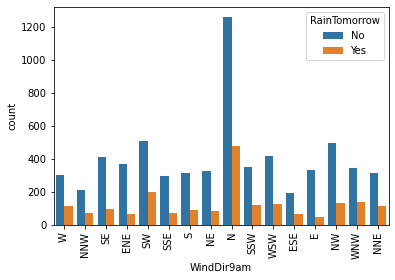

In [31]:
sns.countplot(df['WindDir9am'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

max wind direction at 9pm will be from N. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'WNW'),
  Text(1, 0, 'WSW'),
  Text(2, 0, 'E'),
  Text(3, 0, 'NW'),
  Text(4, 0, 'W'),
  Text(5, 0, 'SSE'),
  Text(6, 0, 'ESE'),
  Text(7, 0, 'ENE'),
  Text(8, 0, 'NNW'),
  Text(9, 0, 'SSW'),
  Text(10, 0, 'SW'),
  Text(11, 0, 'SE'),
  Text(12, 0, 'N'),
  Text(13, 0, 'S'),
  Text(14, 0, 'NNE'),
  Text(15, 0, 'NE')])

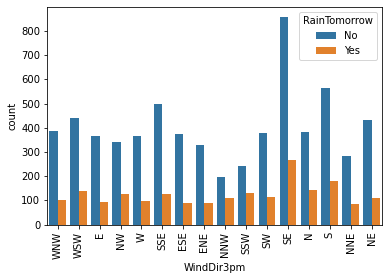

In [32]:
sns.countplot(df['WindDir3pm'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

max wind direction at 3pm will be from SE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'W'),
  Text(1, 0, 'WNW'),
  Text(2, 0, 'WSW'),
  Text(3, 0, 'NE'),
  Text(4, 0, 'NNW'),
  Text(5, 0, 'N'),
  Text(6, 0, 'NNE'),
  Text(7, 0, 'SW'),
  Text(8, 0, 'ENE'),
  Text(9, 0, 'SSE'),
  Text(10, 0, 'S'),
  Text(11, 0, 'NW'),
  Text(12, 0, 'SE'),
  Text(13, 0, 'ESE'),
  Text(14, 0, 'E'),
  Text(15, 0, 'SSW')])

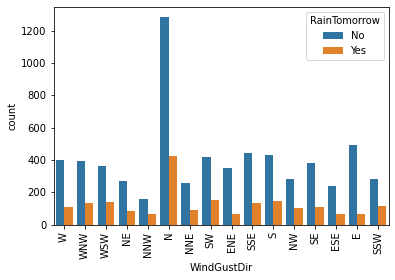

In [33]:
sns.countplot(df['WindGustDir'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

maximum wind gust dir will be from N

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

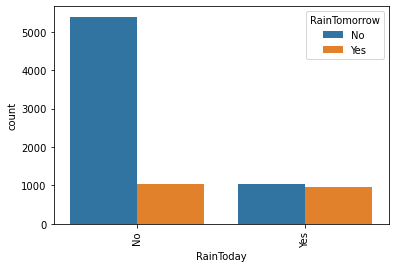

In [34]:
sns.countplot(df['RainToday'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

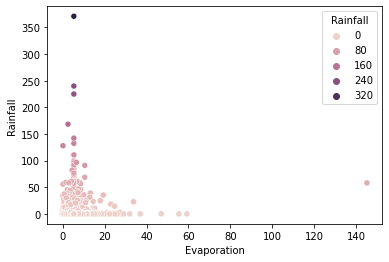

In [35]:
sns.scatterplot(x='Evaporation', y='Rainfall', hue='Rainfall', data=df)

rainfall decreases with increases in evaporation and max rainfall occurs when evaporation between 0 and 18

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

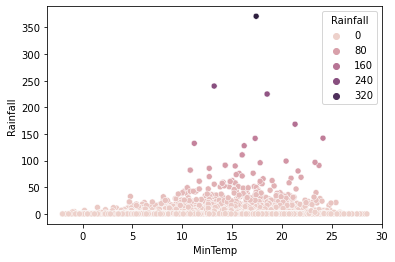

In [37]:
sns.scatterplot(x='MinTemp', y='Rainfall', hue='Rainfall', data=df)

rainfall increases with incraese in min temperature

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

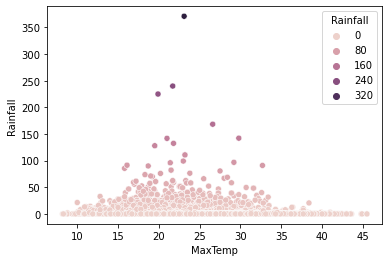

In [38]:
sns.scatterplot(x='MaxTemp', y='Rainfall', hue='Rainfall', data=df)

rainfall is max when max temp is between 18 and 30

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

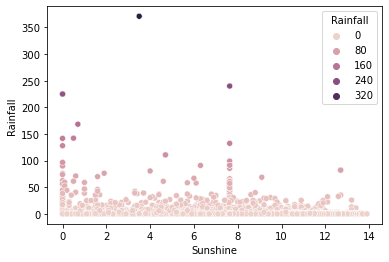

In [39]:
sns.scatterplot(x='Sunshine', y='Rainfall', hue='Rainfall', data=df)

rainfall decraeses with sunshine

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

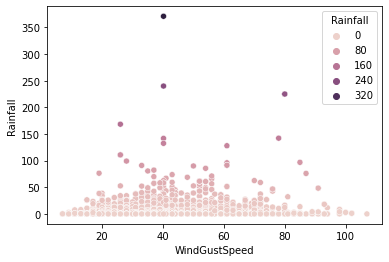

In [40]:
sns.scatterplot(x='WindGustSpeed', y='Rainfall', hue='Rainfall', data=df)

rainfall is max when windgust speed is between 30 and 50

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

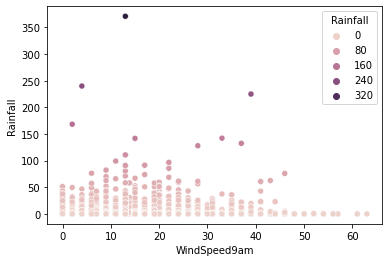

In [41]:
sns.scatterplot(x='WindSpeed9am', y='Rainfall', hue='Rainfall', data=df)

rainfall is max for windspeed9am between 10 and 20

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

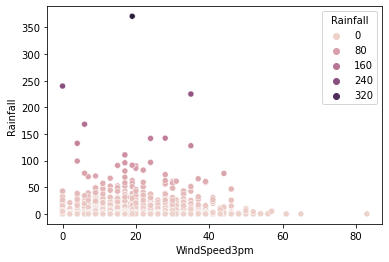

In [42]:
sns.scatterplot(x='WindSpeed3pm', y='Rainfall', hue='Rainfall', data=df)

rainfall is max for windspeed3pm between 10 and 30

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

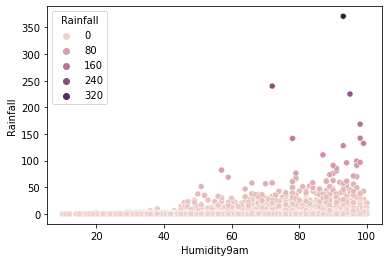

In [43]:
sns.scatterplot(x='Humidity9am', y='Rainfall', hue='Rainfall', data=df)

rainfall incraeses with incraese in humidity

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

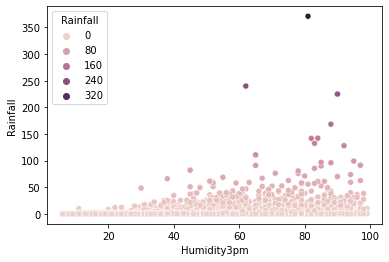

In [44]:
sns.scatterplot(x='Humidity3pm', y='Rainfall', hue='Rainfall', data=df)

rainfall incraeses with incraese in humidity during 3pm

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

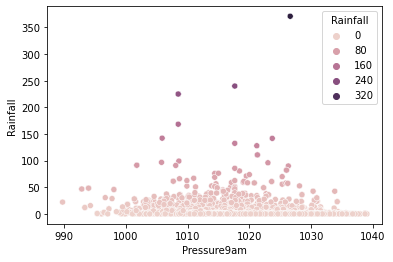

In [45]:
sns.scatterplot(x='Pressure9am', y='Rainfall', hue='Rainfall', data=df)

rainfall is max for wind pressure between 1010 and 1025

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

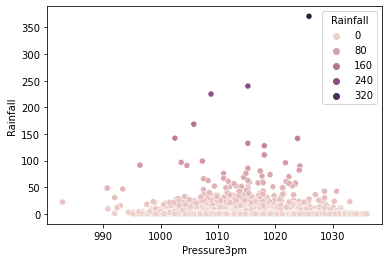

In [46]:
sns.scatterplot(x='Pressure3pm', y='Rainfall', hue='Rainfall', data=df)

rainfall is max for wind pressure between 1010 and 1025

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

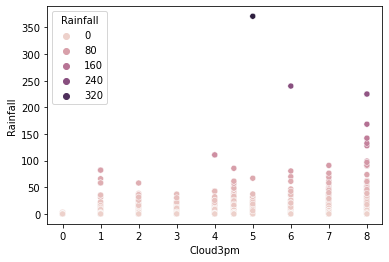

In [48]:
sns.scatterplot(x='Cloud3pm', y='Rainfall', hue='Rainfall', data=df)

rainfall is max at cloud level 8

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

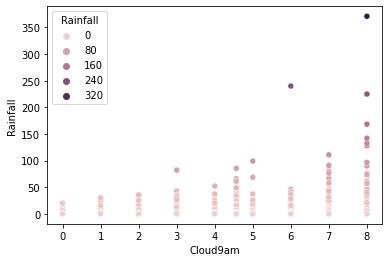

In [49]:
sns.scatterplot(x='Cloud9am', y='Rainfall', hue='Rainfall', data=df)

rainfall is max at cloud level 8

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

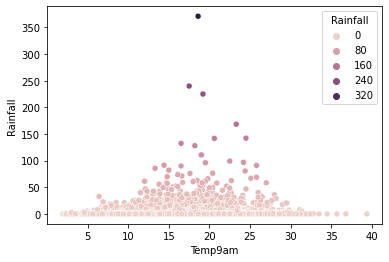

In [50]:
sns.scatterplot(x='Temp9am', y='Rainfall', hue='Rainfall', data=df)

rainfall is max at temp at 9am between 15 and 25

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

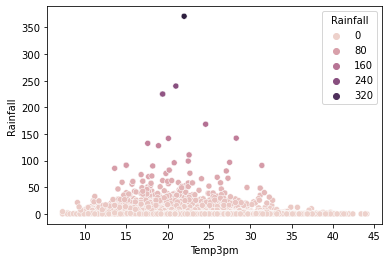

In [51]:
sns.scatterplot(x='Temp3pm', y='Rainfall', hue='Rainfall', data=df)

rainfall is max at temp at 3pm between 20 and 25

# Label Encoder

In [185]:
l=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [186]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [187]:
l2=['Date','Location']

In [188]:
for i in l:
    df[i]=le.fit_transform(df[i])

In [189]:
for i in l2:
    df[i]=le.fit_transform(df[i])

In [190]:
df.dtypes

Date               int32
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

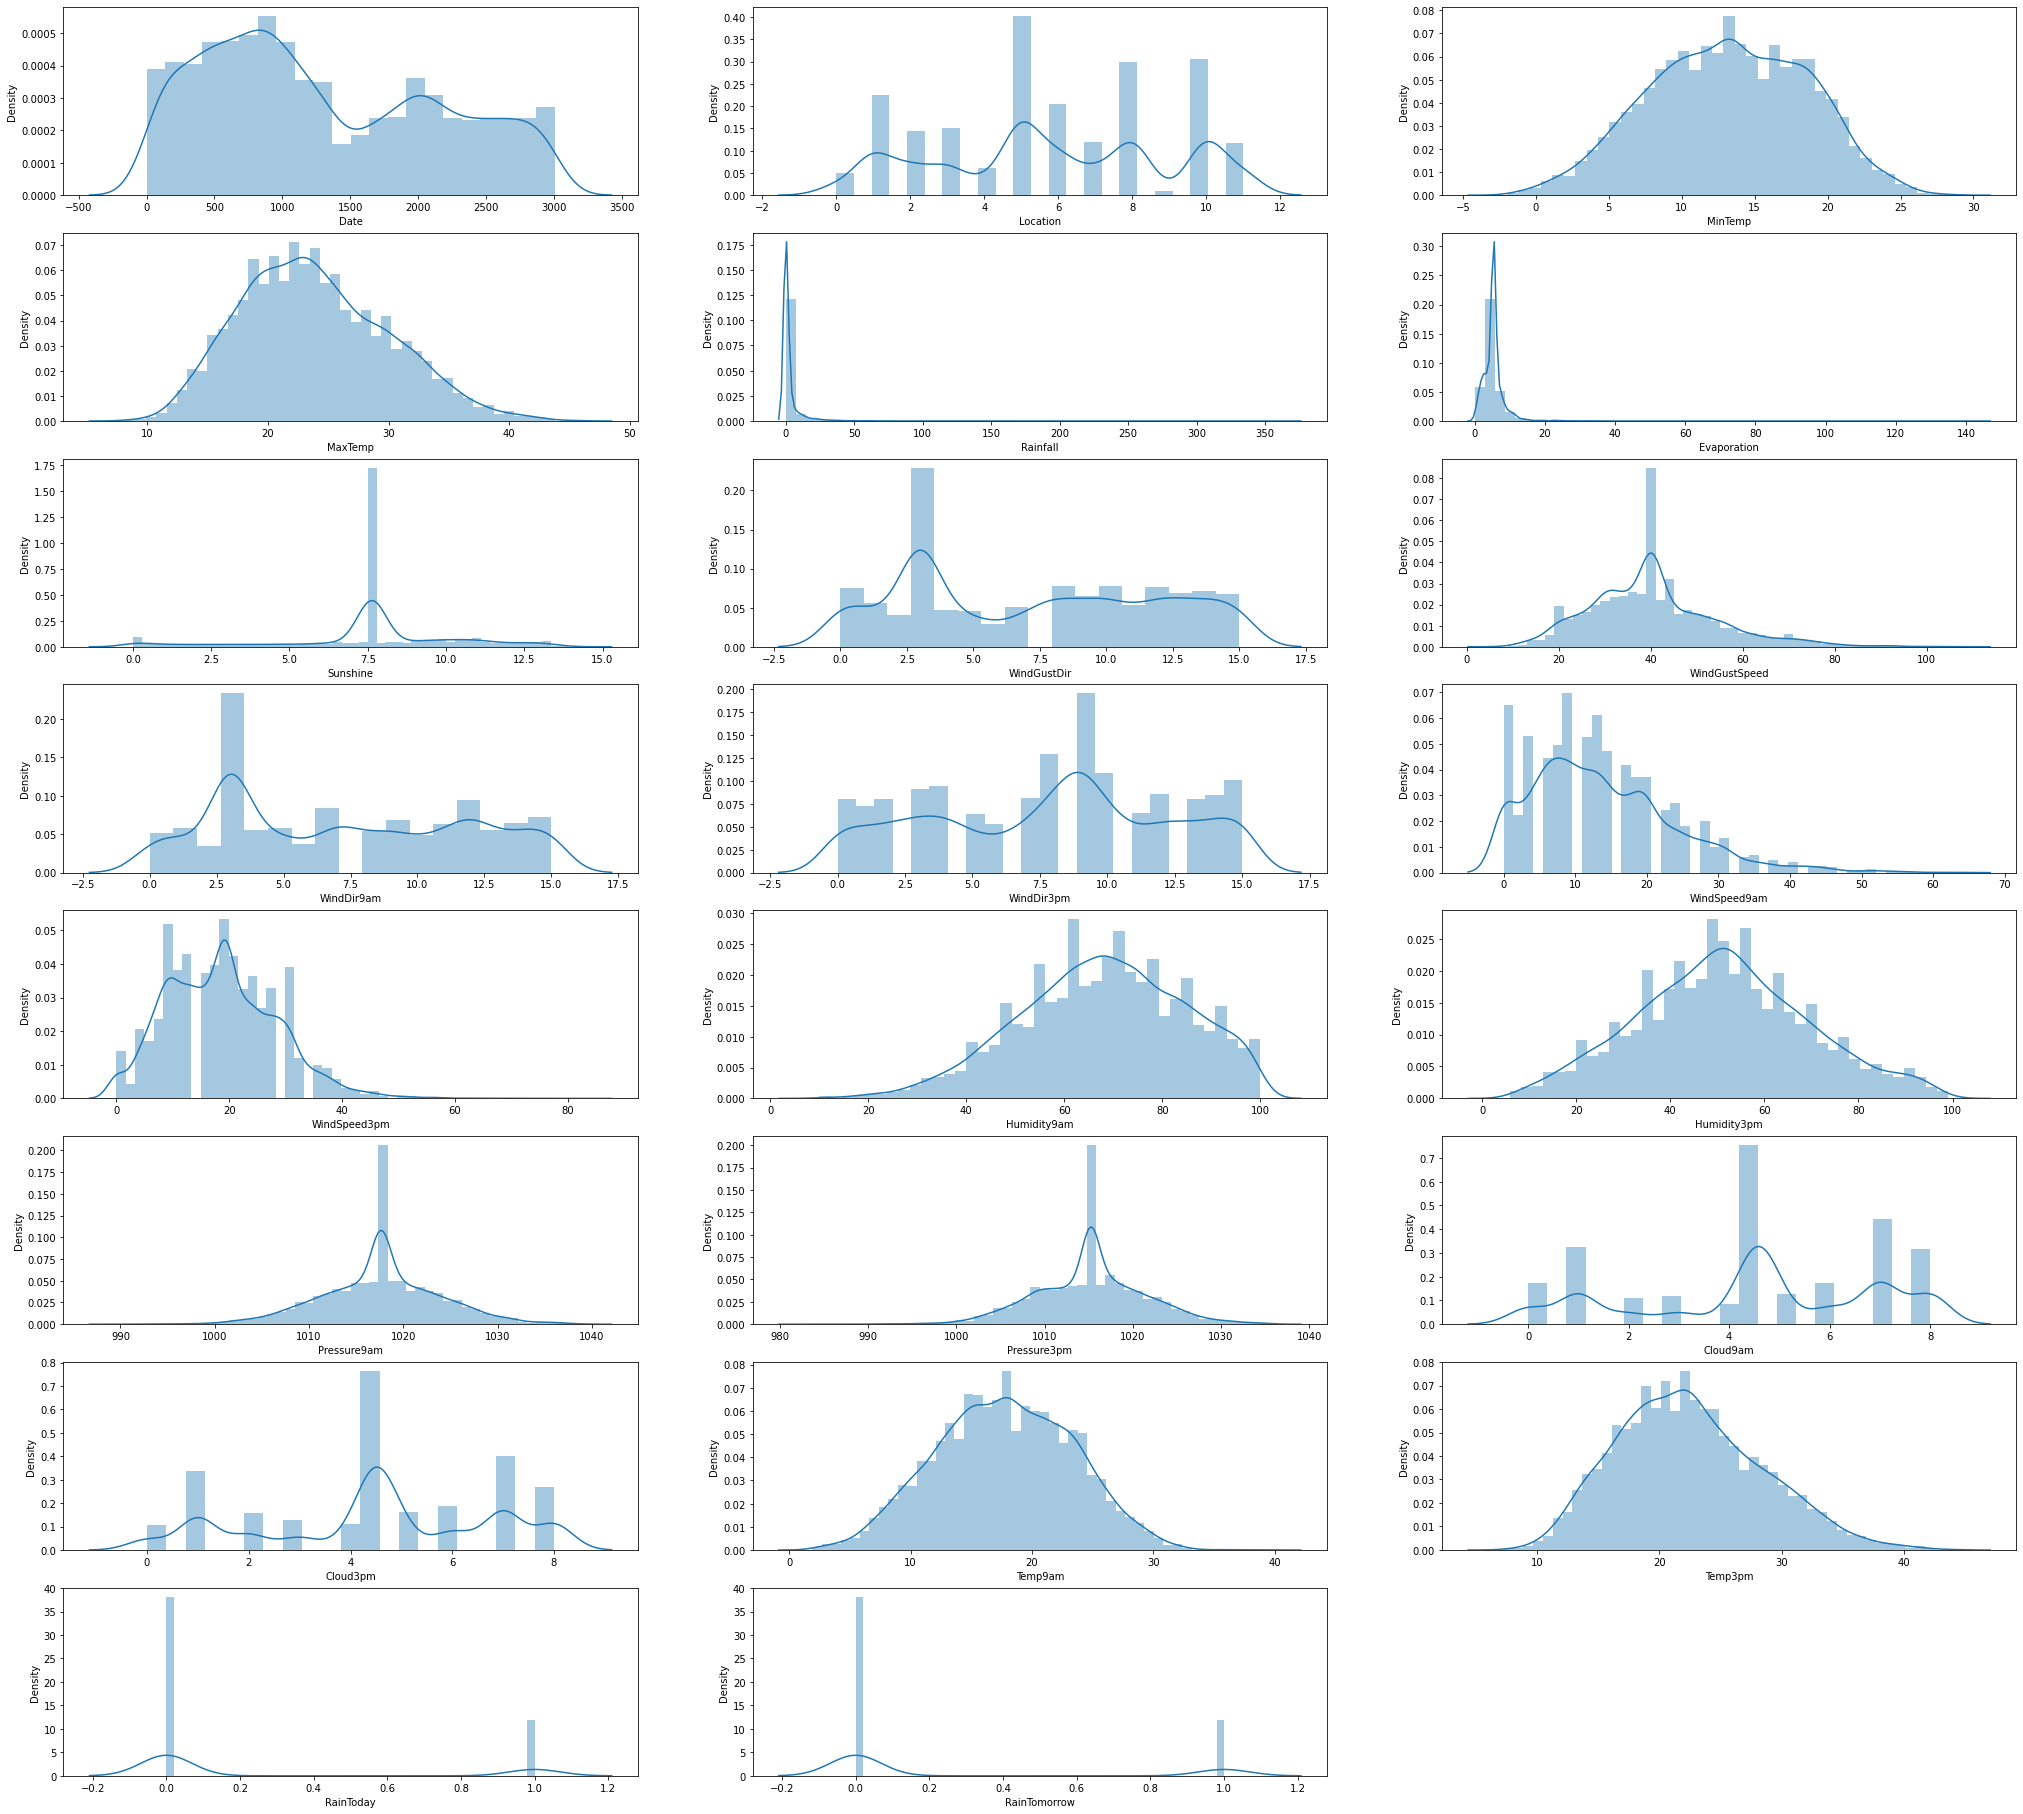

In [193]:
plt.figure(figsize=(35,45))
count =1
for column in df:
    if count <= 31:
        ax = plt.subplot(11,3,count)
        sns.distplot(df[column])
        plt.xlabel(column) 
    count+=1
plt.show()

# descriptive statistics

In [194]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,1296.570564,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,7.810445,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320
std,854.249434,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,4.430162,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846
min,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,589.000000,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,1088.000000,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,8.000000,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,2021.000000,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,3003.000000,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


few outliers are present and it can be identified from the difference between 75th percentile and max value

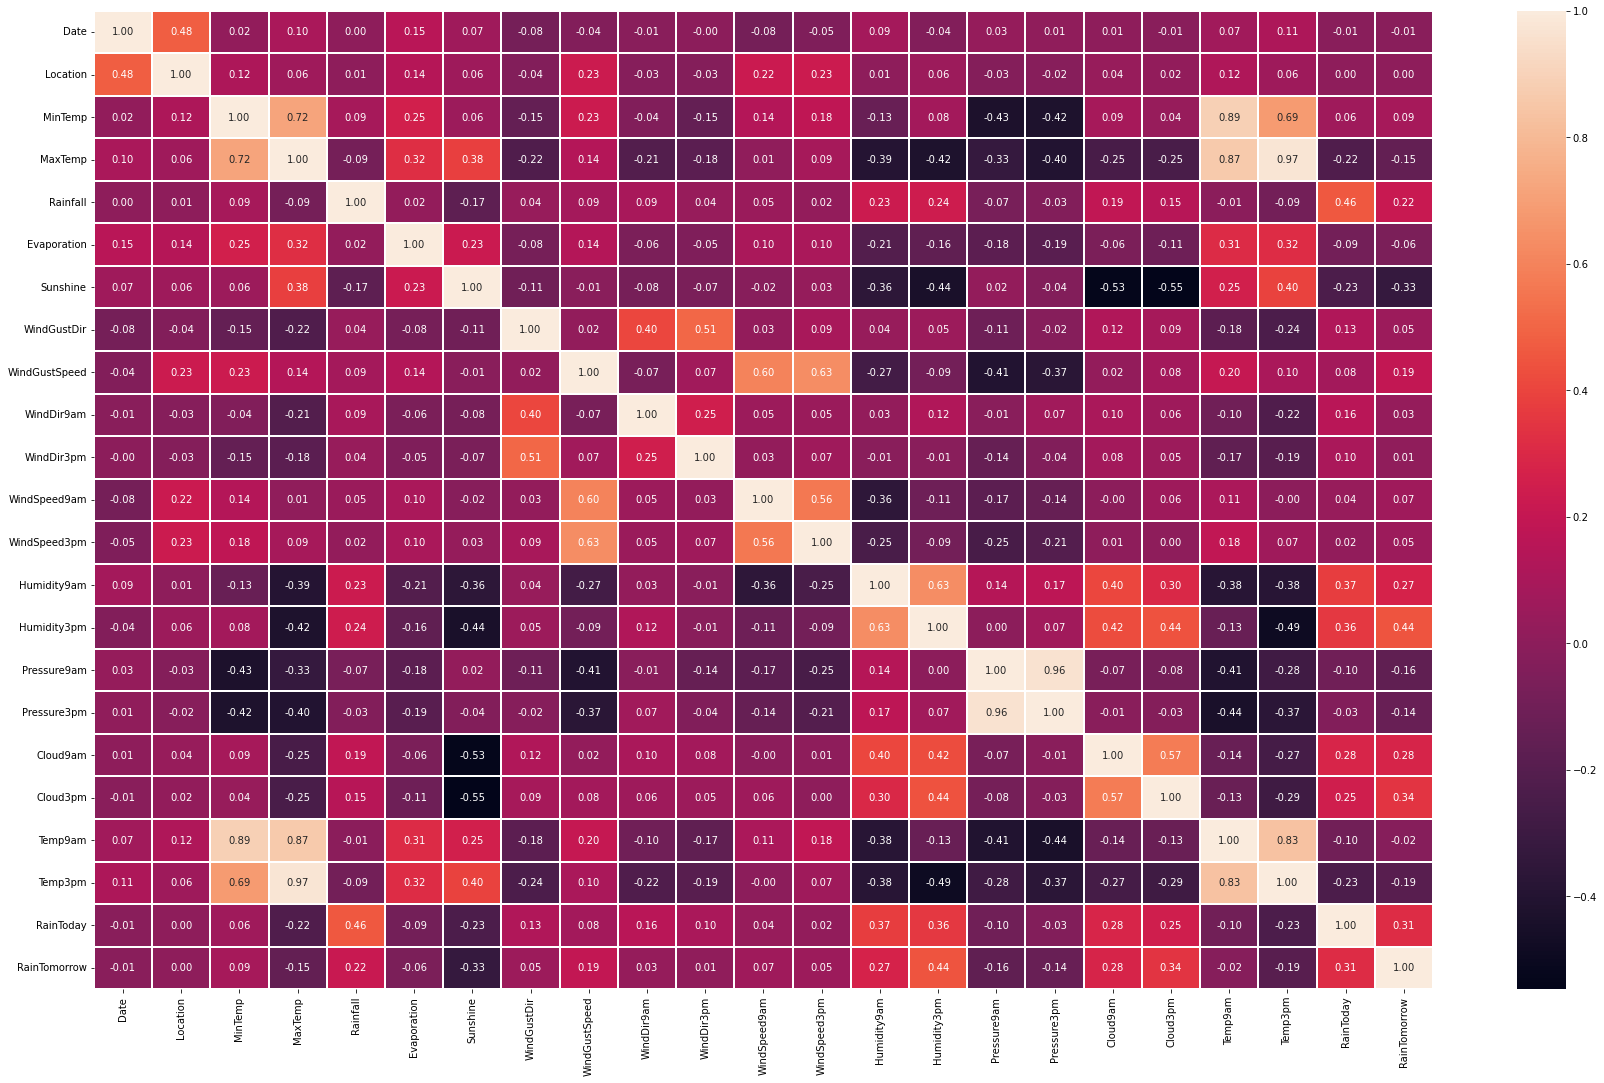

In [61]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

multicollinearity is present in some columns 

In [195]:
df.corr()["Rainfall"].sort_values()

Sunshine        -0.169432
Temp3pm         -0.090687
MaxTemp         -0.087451
Pressure9am     -0.072668
Pressure3pm     -0.033649
Temp9am         -0.007083
Date             0.004945
Location         0.007693
Evaporation      0.023517
WindSpeed3pm     0.024791
WindDir3pm       0.038560
WindGustDir      0.038812
WindSpeed9am     0.050631
WindGustSpeed    0.086000
MinTemp          0.087684
WindDir9am       0.093821
Cloud3pm         0.150760
Cloud9am         0.185444
RainTomorrow     0.220021
Humidity9am      0.228800
Humidity3pm      0.235444
RainToday        0.461106
Rainfall         1.000000
Name: Rainfall, dtype: float64

In [196]:
# importing libraries to calculate the variance inflation factor, which may result in low accuracy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [200]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [201]:
x=df.drop(["RainTomorrow"],axis=1)
y=df["RainTomorrow"]

In [199]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [202]:
calc_vif(x)

,Variables,VIF factor
0,Date,4.893556
1,Location,6.641970
2,MinTemp,58.043435
3,MaxTemp,426.072409
4,Rainfall,1.410755
5,Evaporation,3.557236
6,Sunshine,15.173789
7,WindGustDir,5.304799
8,WindGustSpeed,20.788671
9,WindDir9am,4.726116


In [203]:
df.corr()["RainTomorrow"].sort_values()

Sunshine        -0.327731
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.059012
Temp9am         -0.023211
Date            -0.011228
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Humidity9am      0.271222
Cloud9am         0.278943
RainToday        0.312929
Cloud3pm         0.344369
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

due to high VIF we can drop columns like MaxTemp,Humidity9am, Pressure9am,Temp9am

In [204]:
dfn=df.drop(['MaxTemp', 'Humidity9am' ,'Pressure9am','Temp3pm'],axis=1)

# checking outliers

Date                 AxesSubplot(0.125,0.71587;0.110714x0.16413)
Location          AxesSubplot(0.257857,0.71587;0.110714x0.16413)
MinTemp           AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Rainfall          AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Evaporation       AxesSubplot(0.656429,0.71587;0.110714x0.16413)
Sunshine          AxesSubplot(0.789286,0.71587;0.110714x0.16413)
WindGustDir         AxesSubplot(0.125,0.518913;0.110714x0.16413)
WindGustSpeed    AxesSubplot(0.257857,0.518913;0.110714x0.16413)
WindDir9am       AxesSubplot(0.390714,0.518913;0.110714x0.16413)
WindDir3pm       AxesSubplot(0.523571,0.518913;0.110714x0.16413)
WindSpeed9am     AxesSubplot(0.656429,0.518913;0.110714x0.16413)
WindSpeed3pm     AxesSubplot(0.789286,0.518913;0.110714x0.16413)
Humidity3pm         AxesSubplot(0.125,0.321957;0.110714x0.16413)
Pressure3pm      AxesSubplot(0.257857,0.321957;0.110714x0.16413)
Cloud9am         AxesSubplot(0.390714,0.321957;0.110714x0.16413)
Cloud3pm         AxesSubp

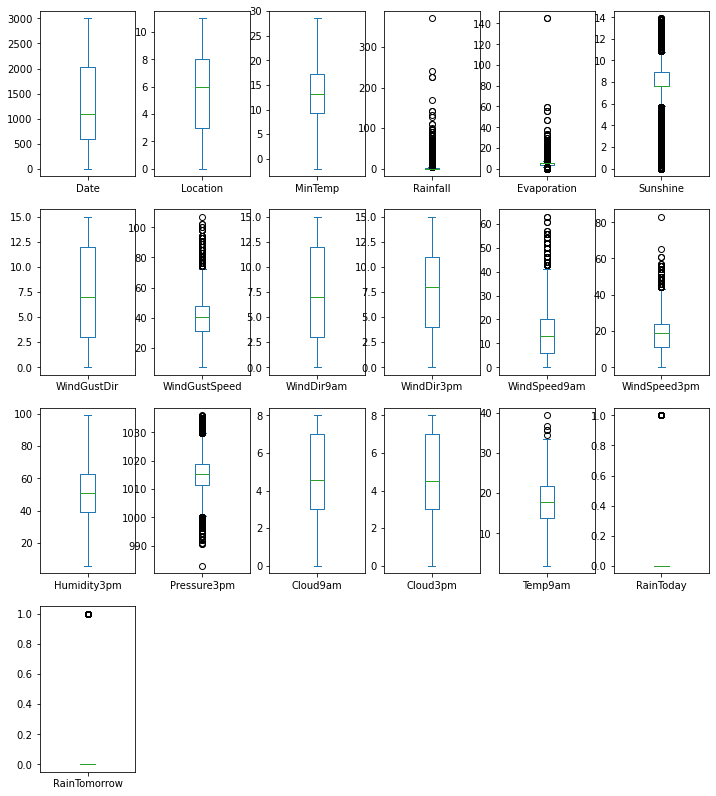

In [206]:
dfn.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,14))

#outliers are present

In [207]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))

In [208]:
np.where(z>3)

(array([  12,   52,   52,   62,  123,  267,  381,  381,  431,  462,  563,
         568,  602,  683,  699,  713,  748,  770,  796,  797,  802,  928,
         935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148,
        1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411,
        1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665,
        1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043,
        2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265,
        2429, 2488, 2500, 2505, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
        2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898,
        2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953,
        2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059, 3066, 3067,
        3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099,
        3101, 3141, 3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3185,
        3206, 3212, 3212, 3213, 3221, 

In [209]:
dfnew=dfn[(z<3).all(axis=1)]

In [210]:
dfnew.shape

(8031, 19)

In [211]:
dfn.shape

(8425, 19)

% loss of data= (8425-8031)/8425*100=4.6%

# checking skewness

In [212]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         3.499160
dtype: float64

In [213]:
list=['Rainfall','RainToday']

In [214]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [215]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         1.670685
dtype: float64

# standard scaler

In [217]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [218]:
x=dfnew.drop(["RainTomorrow"],axis=1)
y=dfnew["RainTomorrow"]

In [219]:
dfx=sc.fit_transform(x)

In [220]:
dfx.mean()

5.744976753665692e-16

# application of machine learning models

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [222]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

# KNeighbors Classifier

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.8311203319502075
at random state 0, confusion matrix is [[1764  117]
 [ 290  239]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1881
           1       0.67      0.45      0.54       529

    accuracy                           0.83      2410
   macro avg       0.77      0.69      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 1,  accuracy score is 0.8128630705394191
at random state 1, confusion matrix is [[1718  119]
 [ 332  241]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.88      1837
           1       0.67      0.42      0.52       573

    accuracy                           0.81      2410
   macro avg       0.75      0.68      0.70      2410
weighted avg       0.80      0.81      0.80      2410



at rando

at random state 17,  accuracy score is 0.8307053941908714
at random state 17, confusion matrix is [[1752  110]
 [ 298  250]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.90      1862
           1       0.69      0.46      0.55       548

    accuracy                           0.83      2410
   macro avg       0.77      0.70      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 18,  accuracy score is 0.829045643153527
at random state 18, confusion matrix is [[1747  103]
 [ 309  251]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1850
           1       0.71      0.45      0.55       560

    accuracy                           0.83      2410
   macro avg       0.78      0.70      0.72      2410
weighted avg       0.82      0.83      0.81      2410



at 

at random state 34,  accuracy score is 0.8265560165975103
at random state 34, confusion matrix is [[1749   95]
 [ 323  243]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.84      0.95      0.89      1844
           1       0.72      0.43      0.54       566

    accuracy                           0.83      2410
   macro avg       0.78      0.69      0.72      2410
weighted avg       0.81      0.83      0.81      2410



at random state 35,  accuracy score is 0.820746887966805
at random state 35, confusion matrix is [[1729  115]
 [ 317  249]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1844
           1       0.68      0.44      0.54       566

    accuracy                           0.82      2410
   macro avg       0.76      0.69      0.71      2410
weighted avg       0.81      0.82      0.81      2410



at 

at random state 51,  accuracy score is 0.8394190871369295
at random state 51, confusion matrix is [[1796   92]
 [ 295  227]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1888
           1       0.71      0.43      0.54       522

    accuracy                           0.84      2410
   macro avg       0.79      0.69      0.72      2410
weighted avg       0.83      0.84      0.82      2410



at random state 52,  accuracy score is 0.8265560165975103
at random state 52, confusion matrix is [[1734  107]
 [ 311  258]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1841
           1       0.71      0.45      0.55       569

    accuracy                           0.83      2410
   macro avg       0.78      0.70      0.72      2410
weighted avg       0.81      0.83      0.81      2410



at

at random state 68,  accuracy score is 0.8257261410788381
at random state 68, confusion matrix is [[1760  110]
 [ 310  230]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1870
           1       0.68      0.43      0.52       540

    accuracy                           0.83      2410
   macro avg       0.76      0.68      0.71      2410
weighted avg       0.81      0.83      0.81      2410



at random state 69,  accuracy score is 0.8215767634854771
at random state 69, confusion matrix is [[1736  113]
 [ 317  244]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1849
           1       0.68      0.43      0.53       561

    accuracy                           0.82      2410
   macro avg       0.76      0.69      0.71      2410
weighted avg       0.81      0.82      0.81      2410



at

at random state 85,  accuracy score is 0.8265560165975103
at random state 85, confusion matrix is [[1761  110]
 [ 308  231]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1871
           1       0.68      0.43      0.53       539

    accuracy                           0.83      2410
   macro avg       0.76      0.68      0.71      2410
weighted avg       0.81      0.83      0.81      2410



at random state 86,  accuracy score is 0.8199170124481328
at random state 86, confusion matrix is [[1734  110]
 [ 324  242]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1844
           1       0.69      0.43      0.53       566

    accuracy                           0.82      2410
   macro avg       0.77      0.68      0.71      2410
weighted avg       0.81      0.82      0.80      2410



at

cv score

In [228]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81642813 0.79701121 0.81506849 0.79763387 0.82129514]
0.809487368850941
0.010147970846645314


# LogisticRegression

In [229]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.8340248962655602
at random state 0, confusion matrix is [[1762  119]
 [ 281  248]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1881
           1       0.68      0.47      0.55       529

    accuracy                           0.83      2410
   macro avg       0.77      0.70      0.73      2410
weighted avg       0.82      0.83      0.82      2410



at random state 1,  accuracy score is 0.8136929460580913
at random state 1, confusion matrix is [[1716  121]
 [ 328  245]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1837
           1       0.67      0.43      0.52       573

    accuracy                           0.81      2410
   macro avg       0.75      0.68      0.70      2410
weighted avg       0.80      0.81      0.80      2410



at rando

at random state 21, confusion matrix is [[1759  113]
 [ 290  248]]
at random state 21, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1872
           1       0.69      0.46      0.55       538

    accuracy                           0.83      2410
   macro avg       0.77      0.70      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 22,  accuracy score is 0.8278008298755186
at random state 22, confusion matrix is [[1733  112]
 [ 303  262]]
at random state 22, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1845
           1       0.70      0.46      0.56       565

    accuracy                           0.83      2410
   macro avg       0.78      0.70      0.73      2410
weighted avg       0.82      0.83      0.81      2410



at random state 23,  accuracy score is 0.8319502074688797
at

at random state 42, confusion matrix is [[1765   82]
 [ 296  267]]
at random state 42, classification report is               precision    recall  f1-score   support

           0       0.86      0.96      0.90      1847
           1       0.77      0.47      0.59       563

    accuracy                           0.84      2410
   macro avg       0.81      0.71      0.74      2410
weighted avg       0.84      0.84      0.83      2410



at random state 43,  accuracy score is 0.8360995850622407
at random state 43, confusion matrix is [[1756   99]
 [ 296  259]]
at random state 43, classification report is               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1855
           1       0.72      0.47      0.57       555

    accuracy                           0.84      2410
   macro avg       0.79      0.71      0.73      2410
weighted avg       0.83      0.84      0.82      2410



at random state 44,  accuracy score is 0.8410788381742739
at

at random state 65,  accuracy score is 0.8294605809128631
at random state 65, confusion matrix is [[1744  105]
 [ 306  255]]
at random state 65, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1849
           1       0.71      0.45      0.55       561

    accuracy                           0.83      2410
   macro avg       0.78      0.70      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 66,  accuracy score is 0.8298755186721992
at random state 66, confusion matrix is [[1740  108]
 [ 302  260]]
at random state 66, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1848
           1       0.71      0.46      0.56       562

    accuracy                           0.83      2410
   macro avg       0.78      0.70      0.73      2410
weighted avg       0.82      0.83      0.82      2410



at

at random state 84, confusion matrix is [[1764  116]
 [ 287  243]]
at random state 84, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1880
           1       0.68      0.46      0.55       530

    accuracy                           0.83      2410
   macro avg       0.77      0.70      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 85,  accuracy score is 0.8307053941908714
at random state 85, confusion matrix is [[1762  109]
 [ 299  240]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.90      1871
           1       0.69      0.45      0.54       539

    accuracy                           0.83      2410
   macro avg       0.77      0.69      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 86,  accuracy score is 0.8365145228215768
at

cv score

In [232]:
score=cross_val_score(lg,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.85810306 0.80134429 0.77520538 0.80792227 0.83781764 0.85127055]
0.8219438648821731
0.029509751991834345


# DecisionTreeClassifier

In [234]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.837344398340249
at random state 0, confusion matrix is [[1683  198]
 [ 194  335]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1881
           1       0.63      0.63      0.63       529

    accuracy                           0.84      2410
   macro avg       0.76      0.76      0.76      2410
weighted avg       0.84      0.84      0.84      2410



at random state 1,  accuracy score is 0.8443983402489627
at random state 1, confusion matrix is [[1649  188]
 [ 187  386]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1837
           1       0.67      0.67      0.67       573

    accuracy                           0.84      2410
   macro avg       0.79      0.79      0.79      2410
weighted avg       0.84      0.84      0.84      2410



at random

at random state 17, confusion matrix is [[1633  229]
 [ 189  359]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1862
           1       0.61      0.66      0.63       548

    accuracy                           0.83      2410
   macro avg       0.75      0.77      0.76      2410
weighted avg       0.83      0.83      0.83      2410



at random state 18,  accuracy score is 0.8365145228215768
at random state 18, confusion matrix is [[1643  207]
 [ 187  373]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1850
           1       0.64      0.67      0.65       560

    accuracy                           0.84      2410
   macro avg       0.77      0.78      0.77      2410
weighted avg       0.84      0.84      0.84      2410



at random state 19,  accuracy score is 0.8423236514522822
at

at random state 36, confusion matrix is [[1641  209]
 [ 212  348]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1850
           1       0.62      0.62      0.62       560

    accuracy                           0.83      2410
   macro avg       0.76      0.75      0.75      2410
weighted avg       0.82      0.83      0.83      2410



at random state 37,  accuracy score is 0.846058091286307
at random state 37, confusion matrix is [[1676  192]
 [ 179  363]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1868
           1       0.65      0.67      0.66       542

    accuracy                           0.85      2410
   macro avg       0.78      0.78      0.78      2410
weighted avg       0.85      0.85      0.85      2410



at random state 38,  accuracy score is 0.833195020746888
at r

at random state 54, confusion matrix is [[1697  187]
 [ 182  344]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1884
           1       0.65      0.65      0.65       526

    accuracy                           0.85      2410
   macro avg       0.78      0.78      0.78      2410
weighted avg       0.85      0.85      0.85      2410



at random state 55,  accuracy score is 0.8323651452282158
at random state 55, confusion matrix is [[1656  190]
 [ 214  350]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       0.89      0.90      0.89      1846
           1       0.65      0.62      0.63       564

    accuracy                           0.83      2410
   macro avg       0.77      0.76      0.76      2410
weighted avg       0.83      0.83      0.83      2410



at random state 56,  accuracy score is 0.8265560165975103
at

at random state 73,  accuracy score is 0.8423236514522822
at random state 73, confusion matrix is [[1650  193]
 [ 187  380]]
at random state 73, classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1843
           1       0.66      0.67      0.67       567

    accuracy                           0.84      2410
   macro avg       0.78      0.78      0.78      2410
weighted avg       0.84      0.84      0.84      2410



at random state 74,  accuracy score is 0.8278008298755186
at random state 74, confusion matrix is [[1636  221]
 [ 194  359]]
at random state 74, classification report is               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1857
           1       0.62      0.65      0.63       553

    accuracy                           0.83      2410
   macro avg       0.76      0.77      0.76      2410
weighted avg       0.83      0.83      0.83      2410



at

at random state 92,  accuracy score is 0.8278008298755186
at random state 92, confusion matrix is [[1649  208]
 [ 207  346]]
at random state 92, classification report is               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1857
           1       0.62      0.63      0.63       553

    accuracy                           0.83      2410
   macro avg       0.76      0.76      0.76      2410
weighted avg       0.83      0.83      0.83      2410



at random state 93,  accuracy score is 0.8481327800829875
at random state 93, confusion matrix is [[1700  196]
 [ 170  344]]
at random state 93, classification report is               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1896
           1       0.64      0.67      0.65       514

    accuracy                           0.85      2410
   macro avg       0.77      0.78      0.78      2410
weighted avg       0.85      0.85      0.85      2410



at

In [237]:
score=cross_val_score(dtc,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.77715566 0.67525196 0.68980963 0.89686099 0.98878924 0.94394619
 0.85201794 0.78587444 0.78475336]
0.8216065997452366
0.10160163937915835


# RandomForestClassifier

In [238]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.8991701244813278
at random state 0, confusion matrix is [[1815   66]
 [ 177  352]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1881
           1       0.84      0.67      0.74       529

    accuracy                           0.90      2410
   macro avg       0.88      0.82      0.84      2410
weighted avg       0.90      0.90      0.89      2410



at random state 1,  accuracy score is 0.8755186721991701
at random state 1, confusion matrix is [[1768   69]
 [ 231  342]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1837
           1       0.83      0.60      0.70       573

    accuracy                           0.88      2410
   macro avg       0.86      0.78      0.81      2410
weighted avg       0.87      0.88      0.87      2410



at rando

at random state 17,  accuracy score is 0.8925311203319503
at random state 17, confusion matrix is [[1797   65]
 [ 194  354]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1862
           1       0.84      0.65      0.73       548

    accuracy                           0.89      2410
   macro avg       0.87      0.81      0.83      2410
weighted avg       0.89      0.89      0.89      2410



at random state 18,  accuracy score is 0.8804979253112033
at random state 18, confusion matrix is [[1776   74]
 [ 214  346]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1850
           1       0.82      0.62      0.71       560

    accuracy                           0.88      2410
   macro avg       0.86      0.79      0.82      2410
weighted avg       0.88      0.88      0.87      2410



at

at random state 34,  accuracy score is 0.8730290456431535
at random state 34, confusion matrix is [[1774   70]
 [ 236  330]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1844
           1       0.82      0.58      0.68       566

    accuracy                           0.87      2410
   macro avg       0.85      0.77      0.80      2410
weighted avg       0.87      0.87      0.86      2410



at random state 35,  accuracy score is 0.8809128630705394
at random state 35, confusion matrix is [[1764   80]
 [ 207  359]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1844
           1       0.82      0.63      0.71       566

    accuracy                           0.88      2410
   macro avg       0.86      0.80      0.82      2410
weighted avg       0.88      0.88      0.88      2410



at

at random state 51,  accuracy score is 0.8966804979253112
at random state 51, confusion matrix is [[1834   54]
 [ 195  327]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.90      0.97      0.94      1888
           1       0.86      0.63      0.72       522

    accuracy                           0.90      2410
   macro avg       0.88      0.80      0.83      2410
weighted avg       0.89      0.90      0.89      2410



at random state 52,  accuracy score is 0.8788381742738589
at random state 52, confusion matrix is [[1772   69]
 [ 223  346]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1841
           1       0.83      0.61      0.70       569

    accuracy                           0.88      2410
   macro avg       0.86      0.79      0.81      2410
weighted avg       0.88      0.88      0.87      2410



at

at random state 68,  accuracy score is 0.8863070539419087
at random state 68, confusion matrix is [[1808   62]
 [ 212  328]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1870
           1       0.84      0.61      0.71       540

    accuracy                           0.89      2410
   macro avg       0.87      0.79      0.82      2410
weighted avg       0.88      0.89      0.88      2410



at random state 69,  accuracy score is 0.8970954356846473
at random state 69, confusion matrix is [[1789   60]
 [ 188  373]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.90      0.97      0.94      1849
           1       0.86      0.66      0.75       561

    accuracy                           0.90      2410
   macro avg       0.88      0.82      0.84      2410
weighted avg       0.89      0.90      0.89      2410



at

at random state 85,  accuracy score is 0.8966804979253112
at random state 85, confusion matrix is [[1822   49]
 [ 200  339]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.90      0.97      0.94      1871
           1       0.87      0.63      0.73       539

    accuracy                           0.90      2410
   macro avg       0.89      0.80      0.83      2410
weighted avg       0.89      0.90      0.89      2410



at random state 86,  accuracy score is 0.8879668049792531
at random state 86, confusion matrix is [[1794   50]
 [ 220  346]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1844
           1       0.87      0.61      0.72       566

    accuracy                           0.89      2410
   macro avg       0.88      0.79      0.82      2410
weighted avg       0.89      0.89      0.88      2410



at

CV score

In [243]:
score=cross_val_score(rf,dfx,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[0.80276429 0.79940232 0.8875607 ]
0.829909102228863
0.040788936046920694


we will select random forest classifier because it gives max accuracy 

# Hyper parameter tuning using Grid Search CV

In [244]:
from sklearn.model_selection import GridSearchCV

In [251]:
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[17,19,20],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}

In [252]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=3)

In [253]:
gd.fit(dfx,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [17, 19, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [254]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'auto',
 'n_estimators': 100}

In [255]:
gd.best_score_

0.8373801519113435

# final model

In [257]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=47,test_size=0.30)
rf=RandomForestClassifier(max_features='auto',max_depth=17,criterion="entropy",n_estimators=100)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")
    

Accuracy score:-- 0.8829875518672199
Confusion matrix:-- [[1784   67]
 [ 215  344]]
classification report:--               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1851
           1       0.84      0.62      0.71       559

    accuracy                           0.88      2410
   macro avg       0.86      0.79      0.82      2410
weighted avg       0.88      0.88      0.88      2410





# AUC ROC 

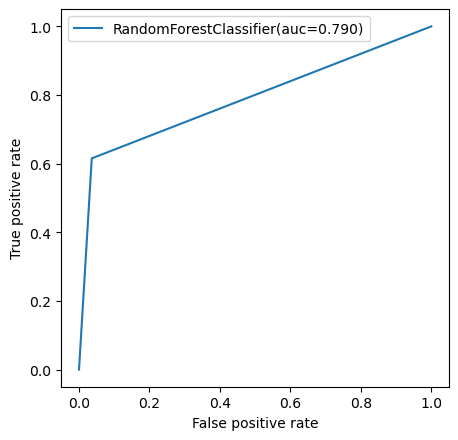

In [258]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='RandomForestClassifier(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

AUC score is 79%

# prediction

In [259]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred})

In [260]:
dfpred.sample(40)

,Expected,Predicted
7436,0,0
3974,0,0
818,1,1
625,1,1
3306,0,0
4679,0,0
1616,0,0
4274,1,1
5546,0,0
8084,0,0


# model saving

In [262]:
import pickle
filename="rain_tomorrow.pkl"
pickle.dump(rf,open(filename,'wb'))

# prediction of amount of rainfall

# check of outliers

Date                 AxesSubplot(0.125,0.71587;0.110714x0.16413)
Location          AxesSubplot(0.257857,0.71587;0.110714x0.16413)
MinTemp           AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Rainfall          AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Evaporation       AxesSubplot(0.656429,0.71587;0.110714x0.16413)
Sunshine          AxesSubplot(0.789286,0.71587;0.110714x0.16413)
WindGustDir         AxesSubplot(0.125,0.518913;0.110714x0.16413)
WindGustSpeed    AxesSubplot(0.257857,0.518913;0.110714x0.16413)
WindDir9am       AxesSubplot(0.390714,0.518913;0.110714x0.16413)
WindDir3pm       AxesSubplot(0.523571,0.518913;0.110714x0.16413)
WindSpeed9am     AxesSubplot(0.656429,0.518913;0.110714x0.16413)
WindSpeed3pm     AxesSubplot(0.789286,0.518913;0.110714x0.16413)
Humidity3pm         AxesSubplot(0.125,0.321957;0.110714x0.16413)
Pressure3pm      AxesSubplot(0.257857,0.321957;0.110714x0.16413)
Cloud9am         AxesSubplot(0.390714,0.321957;0.110714x0.16413)
Cloud3pm         AxesSubp

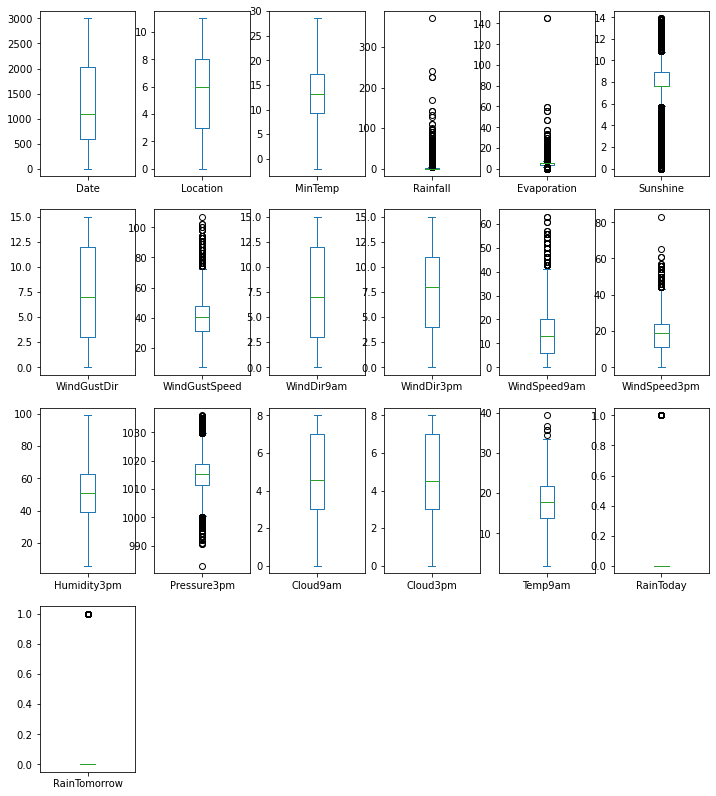

In [263]:
dfn.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,14))

outliers are present

In [264]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))

In [265]:
dfn.shape

(8425, 19)

In [266]:
np.where(z>3)

(array([  12,   52,   52,   62,  123,  267,  381,  381,  431,  462,  563,
         568,  602,  683,  699,  713,  748,  770,  796,  797,  802,  928,
         935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148,
        1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411,
        1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665,
        1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043,
        2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265,
        2429, 2488, 2500, 2505, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
        2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898,
        2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953,
        2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059, 3066, 3067,
        3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099,
        3101, 3141, 3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3185,
        3206, 3212, 3212, 3213, 3221, 

In [267]:
dfnew=dfn[(z<3).all(axis=1)]

In [268]:
dfnew.shape

(8031, 19)

% loss of data= (8425-8031)/8425*100=4.6%

# checking the skewness of the data

In [269]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         3.499160
dtype: float64

In [270]:
x=dfnew.drop(["Rainfall"],axis=1)
y=dfnew["Rainfall"]

In [271]:
list=['RainTomorrow','RainToday']

In [272]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [273]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         3.499160
dtype: float64

# scaling of data

In [274]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [275]:
dfx=sc.fit_transform(xx)

In [276]:
dfx.mean()

3.047472268371603e-17

# application of machine learning models

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [278]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

# KNeighbors Regressor model

In [280]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, testing accuracy is 0.4645774335562297
at random state 0, mean squared error is 12.413474588420241
at random state 0, mean absolute error is 1.3900201846815219


at random state 1, testing accuracy is 0.44197428190877763
at random state 1, mean squared error is 12.341485084201421
at random state 1, mean absolute error is 1.428912208092427


at random state 2, testing accuracy is 0.47244702183098886
at random state 2, mean squared error is 12.202200160470138
at random state 2, mean absolute error is 1.3968184681521962


at random state 3, testing accuracy is 0.507282979313428
at random state 3, mean squared error is 10.642885810528846
at random state 3, mean absolute error is 1.3441656364618


at random state 4, testing accuracy is 0.44765961184802927
at random state 4, mean squared error is 12.071367348271806
at random state 4, mean absolute error is 1.3784293209164624


at random state 5, testing accuracy is 0.4635619317383687
at random state 5, mean squared error i

at random state 45, testing accuracy is 0.49666253286712503
at random state 45, mean squared error is 10.789513514253942
at random state 45, mean absolute error is 1.3490883140650465


at random state 46, testing accuracy is 0.48214928940870705
at random state 46, mean squared error is 11.83933436498788
at random state 46, mean absolute error is 1.3794809399848422


at random state 47, testing accuracy is 0.44868227032758823
at random state 47, mean squared error is 11.791982090436532
at random state 47, mean absolute error is 1.3839992578266591


at random state 48, testing accuracy is 0.47564117269119366
at random state 48, mean squared error is 10.643982461248303
at random state 48, mean absolute error is 1.3364660818164995


at random state 49, testing accuracy is 0.5159302693439476
at random state 49, mean squared error is 11.586971536686205
at random state 49, mean absolute error is 1.3853607444039167


at random state 50, testing accuracy is 0.46315886051624244
at random state 5

at random state 90, testing accuracy is 0.4710264936532349
at random state 90, mean squared error is 11.601660212891243
at random state 90, mean absolute error is 1.3807738992236076


at random state 91, testing accuracy is 0.5059839420987119
at random state 91, mean squared error is 11.79775937535561
at random state 91, mean absolute error is 1.4299670006615683


at random state 92, testing accuracy is 0.4409512272307383
at random state 92, mean squared error is 11.335821526658023
at random state 92, mean absolute error is 1.3750958057574196


at random state 93, testing accuracy is 0.4549279844424403
at random state 93, mean squared error is 12.741293999145952
at random state 93, mean absolute error is 1.4236379948139117


at random state 94, testing accuracy is 0.43912569250229727
at random state 94, mean squared error is 11.16206288657725
at random state 94, mean absolute error is 1.3557791608473144


at random state 95, testing accuracy is 0.4185298882438564
at random state 95, me

CV score

In [138]:
score=cross_val_score(knr,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.29402378 0.43359408 0.33490452 0.56921753 0.59754033 0.51055362
 0.47274388 0.50592942 0.41451913]
0.459225143055994
0.09523699126099232


# Linear regression

In [279]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, testing accuracy is 0.4838935168491729
at random state 0, mean squared error is 11.965641934116269
at random state 0, mean absolute error is 1.5979266527302571


at random state 1, testing accuracy is 0.4584325839039183
at random state 1, mean squared error is 11.9774877235079
at random state 1, mean absolute error is 1.651128555952783


at random state 2, testing accuracy is 0.48944174825890907
at random state 2, mean squared error is 11.809115366852543
at random state 2, mean absolute error is 1.5869604973627367


at random state 3, testing accuracy is 0.47740368790709176
at random state 3, mean squared error is 11.288290521926955
at random state 3, mean absolute error is 1.6087945451310885


at random state 4, testing accuracy is 0.46824185980390187
at random state 4, mean squared error is 11.621543505478341
at random state 4, mean absolute error is 1.5861820461018514


at random state 5, testing accuracy is 0.49647576850085184
at random state 5, mean squared erro

at random state 58, mean absolute error is 1.6293124012260278


at random state 59, testing accuracy is 0.48482015931691946
at random state 59, mean squared error is 10.947614647870179
at random state 59, mean absolute error is 1.5942799279861997


at random state 60, testing accuracy is 0.4870666032301857
at random state 60, mean squared error is 12.224216460945836
at random state 60, mean absolute error is 1.6330060077460264


at random state 61, testing accuracy is 0.4786946854060681
at random state 61, mean squared error is 11.331651408089536
at random state 61, mean absolute error is 1.5637262623982857


at random state 62, testing accuracy is 0.4915018889888333
at random state 62, mean squared error is 10.654519608040546
at random state 62, mean absolute error is 1.5175067850270285


at random state 63, testing accuracy is 0.49447877879610025
at random state 63, mean squared error is 11.113707806098866
at random state 63, mean absolute error is 1.5648331530520243


at random stat

In [106]:
score=cross_val_score(lm,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.50388946 0.46261728 0.41511324 0.51389969]
0.4738799161266599
0.03899527147167383


# random forest regressor

In [281]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model_selection(rfr)

at random state 0, testing accuracy is 0.5835511262440289
at random state 0, mean squared error is 9.655135654968479
at random state 0, mean absolute error is 1.1735884463280417


at random state 1, testing accuracy is 0.5676658068427695
at random state 1, mean squared error is 9.561648904805459
at random state 1, mean absolute error is 1.2001666377874716


at random state 2, testing accuracy is 0.6161964822438823
at random state 2, mean squared error is 8.87730245065992
at random state 2, mean absolute error is 1.1628726279475916


at random state 3, testing accuracy is 0.601706255708518
at random state 3, mean squared error is 8.603305064711241
at random state 3, mean absolute error is 1.1512301947444596


at random state 4, testing accuracy is 0.5820662704652004
at random state 4, mean squared error is 9.133917570879774
at random state 4, mean absolute error is 1.1710719054945666


at random state 5, testing accuracy is 0.6013303714190481
at random state 5, mean squared error is 9.5

at random state 46, testing accuracy is 0.6231716951038127
at random state 46, mean squared error is 8.615217105260788
at random state 46, mean absolute error is 1.1487411929523947


at random state 47, testing accuracy is 0.5849807194479686
at random state 47, mean squared error is 8.876732345182011
at random state 47, mean absolute error is 1.1479684322855541


at random state 48, testing accuracy is 0.6052865971449418
at random state 48, mean squared error is 8.012304396154706
at random state 48, mean absolute error is 1.1235697495418446


at random state 49, testing accuracy is 0.6460619060714144
at random state 49, mean squared error is 8.472065821057164
at random state 49, mean absolute error is 1.1548081571643298


at random state 50, testing accuracy is 0.6177625513379319
at random state 50, mean squared error is 8.387272451158237
at random state 50, mean absolute error is 1.1513734774420366


at random state 51, testing accuracy is 0.5468731999268089
at random state 51, mean s

at random state 91, testing accuracy is 0.5989963738444304
at random state 91, mean squared error is 9.5764990112402
at random state 91, mean absolute error is 1.20147564540945


at random state 92, testing accuracy is 0.5768727183199001
at random state 92, mean squared error is 8.579743989824026
at random state 92, mean absolute error is 1.150667933244955


at random state 93, testing accuracy is 0.5940570324448395
at random state 93, mean squared error is 9.489092356384011
at random state 93, mean absolute error is 1.1910110383076014


at random state 94, testing accuracy is 0.613916764117727
at random state 94, mean squared error is 7.68351358007038
at random state 94, mean absolute error is 1.0974826344111914


at random state 95, testing accuracy is 0.5697214246961742
at random state 95, mean squared error is 8.831962415687332
at random state 95, mean absolute error is 1.1759594338900476


at random state 96, testing accuracy is 0.5673105611892841
at random state 96, mean squared 

In [282]:
score=cross_val_score(rfr,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.45995842 0.4701905  0.49452039 0.86494868 0.92608483 0.79861058
 0.62069463 0.52118168 0.53399359]
0.6322425890657809
0.17166005194497294


# building final model

In [287]:
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=44,test_size=0.30)
instance=rf
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)

print(f"at random state {44} testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {44} mean squared error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {44}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")

at random state 44 testing accuracy is 0.6540735531752251
at random state 44 mean squared error is 7.053867685394206
at random state 44, mean absolute error is 1.0447061250592493


# visualisation

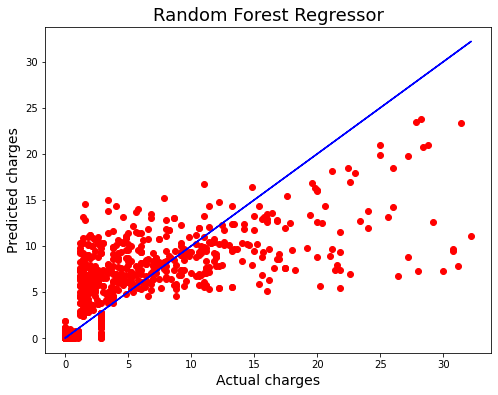

In [288]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Random Forest Regressor',fontsize= 18)
plt.show()

# saving the model

In [289]:
import pickle
filename = 'rainfall.pkl'
pickle.dump(knr,open(filename, 'wb'))